# Learning Markov Decision Process (MDP) Algorithm with the MDPToolBox Python Package

The MDPToolBox can be installed using pip

In [2]:
!pip install pymdptoolbox

In [3]:
import mdptoolbox.example
import mdptoolbox.mdp
import numpy as np

## Forest Management Example
* Trees can be either young, middle-aged, or old (states = 0, 1, 2)
* Each year, the trees get one stage older (S+1).
* Each year, there is a 10% chance that the whole forest burns down!
* If the forest burns down, you get nothing.
* If you cut down the trees, you get 0 points for a young one, 1 point for a middle-aged one, and 2 points for an old one.
* If the forest reaches its oldest state, and you do not cut, you will receive 4 points!

What is the best strategy, given these facts?

In [5]:
# inputs
'''
S : is the number of states
r1 : is the reward for the first action (keep/wait)
r2 : is the reward for the second action (cut)
p : probability of a wildfire
'''
# outputs
'''
P : is the probability transition matrix (A, S, S)
R : is the reward matrix (S, A)
'''

P, R = mdptoolbox.example.forest(S=3, r1=4, r2=2, p=0.1)

Exploring the probability transition matrix

In [6]:
P

array([[[0.1, 0.9, 0. ],
        [0.1, 0. , 0.9],
        [0.1, 0. , 0.9]],

       [[1. , 0. , 0. ],
        [1. , 0. , 0. ],
        [1. , 0. , 0. ]]])

In [7]:
P[0] # P[0] is the transition matrix for action 0 (keep/wait)

array([[0.1, 0.9, 0. ],
       [0.1, 0. , 0.9],
       [0.1, 0. , 0.9]])

In [8]:
'''
ex: what is the probability that a forest in its youngest state
 will advance to the next oldest (middle-aged state), if we wait?
'''
print(P[0][0][1]) # 0.9

0.9


In [9]:
'''
ex: what is the probability that a forest in its oldest state
 will burn down, if we wait?
'''
P[0][2][0] # 0.1

0.1

Exploring the rewards matrix. Rewards matrix has shape S x A (S,A). 

In [10]:
R

array([[0., 0.],
       [0., 1.],
       [4., 2.]])

In [13]:
# what reward do we get if we choose to wait, and the forest is in its oldest state?
def compute_reward(action, states):
    return np.sum(np.multiply(R.T[action], states))

compute_reward(1, [10, 5, 3])

11.0

## Finding the optimal "policy"

In [14]:
# 99% discount says that it is very likely 
# that the scenario will continue into the future (long-term strategy)
model = mdptoolbox.mdp.PolicyIteration(P, R, 0.99)

In [15]:
model.run()

In [16]:
model.policy

(0, 0, 0)

## applying a discount to our model.

(what is a discount?)

In [17]:
# 1% discount says that it is very unlikely 
# that the scenario will continue into the future (short-term strategy)
model = mdptoolbox.mdp.PolicyIteration(P, R, 0.01)

In [18]:
model.run()

In [19]:
model.policy

(0, 1, 0)

In [ ]:
def calculate_policy(S=3, r1=4, r2=2, p=0.1, discount=0.99):
    # build the P and R matrices
    P, R = mdptoolbox.example.forest(S=3, r1=4, r2=2, p=0.1)
    # create the model
    model = mdptoolbox.mdp.PolicyIteration(P, R, discount)
    # run the model
    model.run()
    # return the policy
    return model.policy

# test the function
policy = calculate_policy(S=3, r1=4, r2=2, p=0.1, discount=0.99)
policy

(0, 0, 0)

/Users/stephencropper/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/stephencropper/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


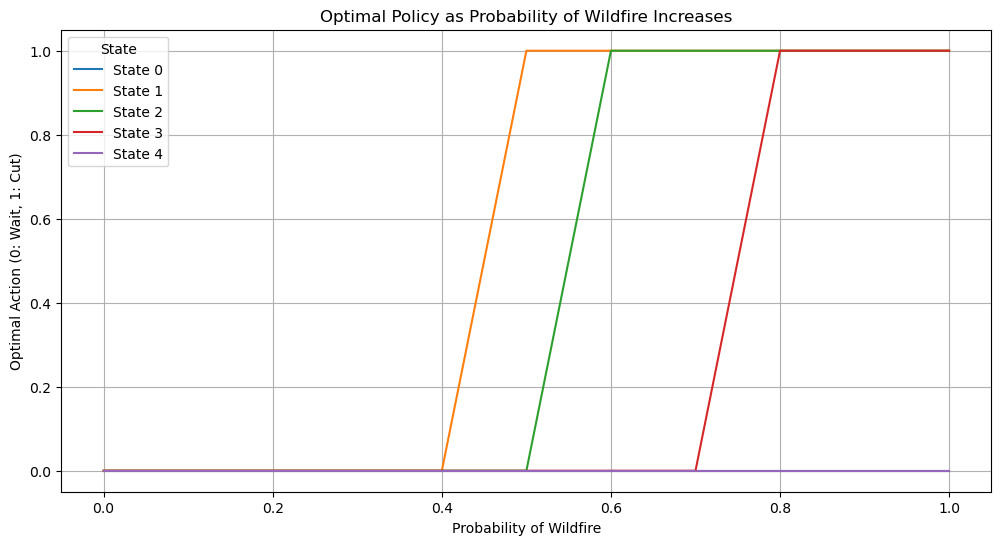

In [29]:
# what happens if we gradually increase the probability of a wildfire?
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import mdptoolbox.example
import mdptoolbox.mdp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def calculate_policy(S=3, r1=4, r2=2, p=0.1, discount=0.99):
    # build the P and R matrices
    P, R = mdptoolbox.example.forest(S=S, r1=r1, r2=r2, p=p)
    # create the model
    model = mdptoolbox.mdp.PolicyIteration(P, R, discount)
    # run the model
    model.run()
    # return the policy
    return model.policy

# here, we vary the probability of wildfire from 0 to 1
p_values = np.arange(0, 1.1, 0.1)
policies = []
for p in p_values:
    policy = calculate_policy(S=5, p=p)
    policies.append(policy)

def plot_policies(p_values, policies):
    # Create a DataFrame for easier plotting
    # Adjust the number of columns dynamically based on the number of states
    num_states = len(policies[0])  # Assuming all policies have the same number of states
    columns = [f'State {i}' for i in range(num_states)]
    df = pd.DataFrame(policies, columns=columns)
    df['p'] = p_values

    # Melt the DataFrame for seaborn
    df_melted = df.melt(id_vars='p', var_name='State', value_name='Action')

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_melted, x='p', y='Action', hue='State')
    plt.title('Optimal Policy as Probability of Wildfire Increases')
    plt.xlabel('Probability of Wildfire')
    plt.ylabel('Optimal Action (0: Wait, 1: Cut)')
    plt.grid()
    plt.show()

plot_policies(p_values, policies)


/Users/stephencropper/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/stephencropper/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


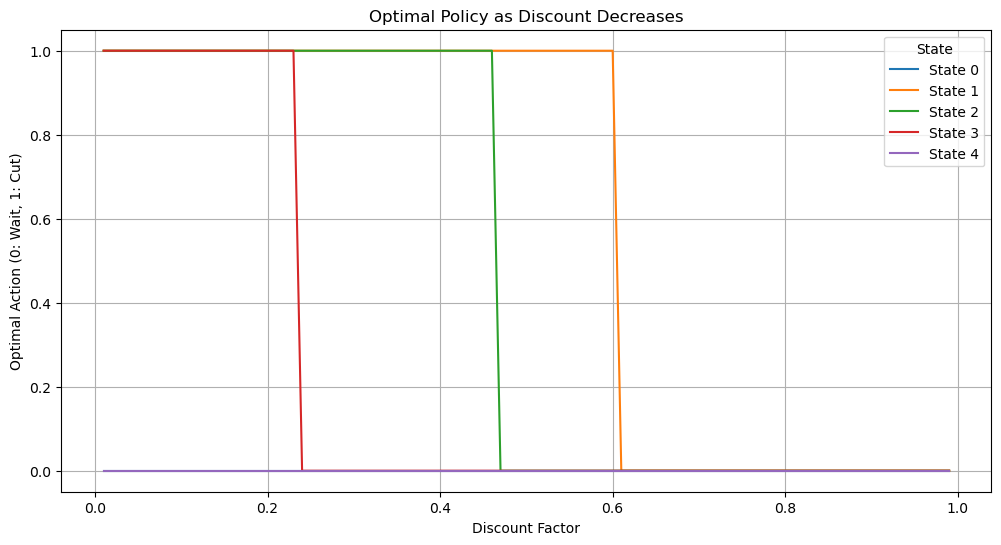

In [ ]:
# what happens if we gradually decrease the discount?
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import mdptoolbox.example
import mdptoolbox.mdp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def calculate_policy(S=3, r1=4, r2=2, p=0.1, discount=0.99):
    # build the P and R matrices
    P, R = mdptoolbox.example.forest(S=S, r1=r1, r2=r2, p=p)
    # create the model
    model = mdptoolbox.mdp.PolicyIteration(P, R, discount)
    # run the model
    model.run()
    # return the policy
    return model.policy

# here, we vary the discount rate from 0 to 1
discount_values = np.arange(0.01, 1, 0.01)
policies = []
for d in discount_values:
    policy = calculate_policy(S=5, discount=d)
    policies.append(policy)

def plot_policies(discount_values, policies):
    # Create a DataFrame for easier plotting
    # Adjust the number of columns dynamically based on the number of states
    num_states = len(policies[0])  # Assuming all policies have the same number of states
    columns = [f'State {i}' for i in range(num_states)]
    df = pd.DataFrame(policies, columns=columns)
    df['discount'] = discount_values

    # Melt the DataFrame for seaborn
    df_melted = df.melt(id_vars='discount', var_name='State', value_name='Action')

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_melted, x='discount', y='Action', hue='State')
    plt.title('Optimal Policy as Discount Decreases')
    plt.xlabel('Discount Factor')
    plt.ylabel('Optimal Action (0: Wait, 1: Cut)')
    plt.grid()
    plt.show()

plot_policies(discount_values, policies)

/Users/stephencropper/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/stephencropper/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


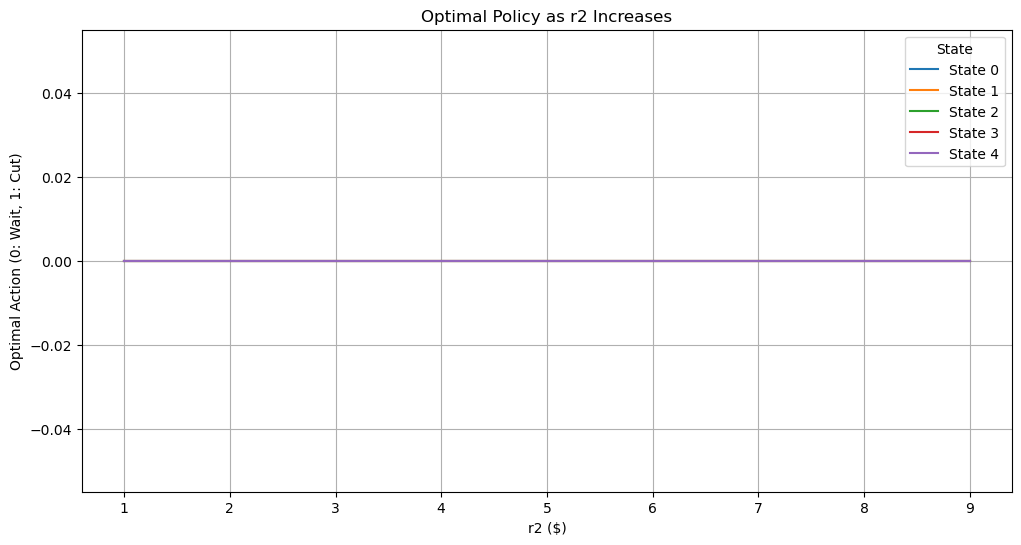

In [34]:
# what happens if we gradually increase the award for cutting the trees?
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import mdptoolbox.example
import mdptoolbox.mdp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def calculate_policy(S=3, r1=4, r2=2, p=0.1, discount=0.99):
    # build the P and R matrices
    P, R = mdptoolbox.example.forest(S=S, r1=r1, r2=r2, p=p)
    # create the model
    model = mdptoolbox.mdp.PolicyIteration(P, R, discount)
    # run the model
    model.run()
    # return the policy
    return model.policy

# here, we vary the probability of wildfire from 0 to 1
r2_values = np.arange(1, 10)
policies = []
for r2 in r2_values:
    policy = calculate_policy(S=5, r2=r2)
    policies.append(policy)

def plot_policies(r2_values, policies):
    # Create a DataFrame for easier plotting
    # Adjust the number of columns dynamically based on the number of states
    num_states = len(policies[0])  # Assuming all policies have the same number of states
    columns = [f'State {i}' for i in range(num_states)]
    df = pd.DataFrame(policies, columns=columns)
    df['r2'] = r2_values

    # Melt the DataFrame for seaborn
    df_melted = df.melt(id_vars='r2', var_name='State', value_name='Action')

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_melted, x='r2', y='Action', hue='State')
    plt.title('Optimal Policy as r2 Increases')
    plt.xlabel('r2 ($)')
    plt.ylabel('Optimal Action (0: Wait, 1: Cut)')
    plt.grid()
    plt.show()

plot_policies(r2_values, policies)